In [1]:
import numpy as np
import pandas as pd
import matplotlib
import tensorflow
import keras

Dataset reading

In [2]:
dataset = pd.read_csv('SoilDataset.csv')

In [3]:
dataset.head(10)

,areasymbol,CoFIPS,mukey,musym,muname,muacres,Temp,tfact,nirrcapcl,nirrcapscl,...,Moisture,Humidity,scier,scifo,Slope,removal,Rem Res - ann avg,crop1,Rem Res - crop1,farmlndcl
0,KS129,129,1382580,1510,"Atchison clay loam, 3 to 6 percent slopes",15733,90,5,3,e,...,0.91,0.88,0.88,0.96,5,MHH,"5,508.90",CG,"5,508.90",1
1,KS129,129,1382580,1510,"Atchison clay loam, 3 to 6 percent slopes",15733,90,5,3,e,...,1.56,2.44,0.99,0.97,5,NRH,0,CG,"4,949.10",1
2,KS129,129,1382580,1510,"Atchison clay loam, 3 to 6 percent slopes",15733,90,5,3,e,...,0.58,0.86,0.66,0.25,5,MHH,"4,949.10",CG,"4,949.10",1
3,KS129,129,1382580,1510,"Atchison clay loam, 3 to 6 percent slopes",15733,90,5,3,e,...,1.10,2.07,0.82,0.27,5,NRH,0,CG,"4,949.10",1
4,KS129,129,1382581,5110,"Atchison fine sandy loam, 1 to 3 percent slopes",62,70,5,3,e,...,0.78,0.51,0.97,0.96,1,MHH,"5,508.90",CG,"5,508.90",1
5,KS129,129,1382581,5110,"Atchison fine sandy loam, 1 to 3 percent slopes",62,70,5,3,e,...,1.29,1.76,1.00,0.97,1,NRH,0,CG,"4,949.10",1
6,KS129,129,1382581,5110,"Atchison fine sandy loam, 1 to 3 percent slopes",62,70,5,3,e,...,0.48,0.50,0.91,0.25,1,MHH,"4,949.10",CG,"4,949.10",1
7,KS129,129,1382581,5110,"Atchison fine sandy loam, 1 to 3 percent slopes",62,70,5,3,e,...,0.88,1.47,0.95,0.27,1,NRH,0,CG,"4,949.10",1
8,KS129,129,1382582,1511,"Atchison loam, 1 to 3 percent slopes",36516,85,5,3,e,...,0.78,0.51,0.94,0.96,1,MHH,"5,508.90",CG,"5,508.90",1
9,KS129,129,1382582,1511,"Atchison loam, 1 to 3 percent slopes",36516,85,5,3,e,...,1.29,1.76,0.99,0.97,1,NRH,0,CG,"4,949.10",1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34352 entries, 0 to 34351
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   areasymbol         34352 non-null  object 
 1   CoFIPS             34352 non-null  int64  
 2   mukey              34352 non-null  int64  
 3   musym              34352 non-null  object 
 4   muname             34352 non-null  object 
 5   muacres            34352 non-null  int64  
 6   Temp               34352 non-null  int64  
 7   tfact              34352 non-null  int64  
 8   nirrcapcl          34352 non-null  int64  
 9   nirrcapscl         34352 non-null  object 
 10  irrcapcl           34352 non-null  int64  
 11  irrcapscl          34352 non-null  object 
 12  awc_r              34352 non-null  float64
 13  texdesc            34352 non-null  object 
 14  texture            34352 non-null  object 
 15  rotation           34352 non-null  object 
 16  yield1             343

Plotting Histogram

In [5]:
dataset = dataset.drop_duplicates()

In [6]:
dataset.shape

(34352, 33)

Preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoders = {}
for column in dataset.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    dataset[column] = label_encoders[column].fit_transform(dataset[column])

In [8]:
dataset.head()

,areasymbol,CoFIPS,mukey,musym,muname,muacres,Temp,tfact,nirrcapcl,nirrcapscl,...,Moisture,Humidity,scier,scifo,Slope,removal,Rem Res - ann avg,crop1,Rem Res - crop1,farmlndcl
0,12,129,1382580,73,63,15733,90,5,3,1,...,0.91,0.88,0.88,0.96,5,0,188,0,144,1
1,12,129,1382580,73,63,15733,90,5,3,1,...,1.56,2.44,0.99,0.97,5,1,0,0,135,1
2,12,129,1382580,73,63,15733,90,5,3,1,...,0.58,0.86,0.66,0.25,5,0,183,0,135,1
3,12,129,1382580,73,63,15733,90,5,3,1,...,1.10,2.07,0.82,0.27,5,1,0,0,135,1
4,12,129,1382581,235,64,62,70,5,3,1,...,0.78,0.51,0.97,0.96,1,0,188,0,144,1


In [9]:
X= dataset.iloc[:,3:32].values

In [10]:
y= dataset.iloc[:, 32].values

In [11]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder()
X= OneHotEncoder.fit_transform(X).toarray()
X= X[:, 1:]

In [12]:
dataset.head()

,areasymbol,CoFIPS,mukey,musym,muname,muacres,Temp,tfact,nirrcapcl,nirrcapscl,...,Moisture,Humidity,scier,scifo,Slope,removal,Rem Res - ann avg,crop1,Rem Res - crop1,farmlndcl
0,12,129,1382580,73,63,15733,90,5,3,1,...,0.91,0.88,0.88,0.96,5,0,188,0,144,1
1,12,129,1382580,73,63,15733,90,5,3,1,...,1.56,2.44,0.99,0.97,5,1,0,0,135,1
2,12,129,1382580,73,63,15733,90,5,3,1,...,0.58,0.86,0.66,0.25,5,0,183,0,135,1
3,12,129,1382580,73,63,15733,90,5,3,1,...,1.10,2.07,0.82,0.27,5,1,0,0,135,1
4,12,129,1382581,235,64,62,70,5,3,1,...,0.78,0.51,0.97,0.96,1,0,188,0,144,1


Feature selection

In [13]:
from sklearn.feature_selection import SelectKBest, f_classif
k_best=10
X = dataset.drop(columns='farmlndcl')
y = dataset['farmlndcl']
selector = SelectKBest(score_func=f_classif, k=k_best)
X_selected = selector.fit_transform(X, y)
selected_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_indices]
print("Selected Features:", selected_feature_names)
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)
df = pd.concat([X_selected_df, y], axis=1)

Selected Features: Index(['Temp', 'tfact', 'nirrcapcl', 'nirrcapscl', 'irrcapcl', 'irrcapscl',
       'awc_r', 'texdesc', 'watereros', 'Slope'],
      dtype='object')


In [14]:
df.head(21)

,Temp,tfact,nirrcapcl,nirrcapscl,irrcapcl,irrcapscl,awc_r,texdesc,watereros,Slope,farmlndcl
0,90.0,5.0,3.0,1.0,2.0,0.0,0.15,24.0,0.30,5.0,1
1,90.0,5.0,3.0,1.0,2.0,0.0,0.15,24.0,0.03,5.0,1
2,90.0,5.0,3.0,1.0,2.0,0.0,0.15,24.0,0.86,5.0,1
3,90.0,5.0,3.0,1.0,2.0,0.0,0.15,24.0,0.46,5.0,1
4,70.0,5.0,3.0,1.0,2.0,0.0,0.15,24.0,0.08,1.0,1
5,70.0,5.0,3.0,1.0,2.0,0.0,0.15,24.0,0.01,1.0,1
6,70.0,5.0,3.0,1.0,2.0,0.0,0.15,24.0,0.22,1.0,1
7,70.0,5.0,3.0,1.0,2.0,0.0,0.15,24.0,0.12,1.0,1
8,85.0,5.0,3.0,1.0,2.0,0.0,0.15,24.0,0.15,1.0,1
9,85.0,5.0,3.0,1.0,2.0,0.0,0.15,24.0,0.02,1.0,1


In [15]:
df.shape

(34352, 11)

In [16]:
X = df.drop('farmlndcl', axis=1)
y = df['farmlndcl']

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

Splitting training and testing data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27481, 10), (6871, 10), (27481,), (6871,))

SVM

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
svclassifier = SVC(kernel='linear') 
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)

printing the values of confusion matrix of svm

In [21]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred) 
print(cm)

[[4337  580]
 [ 504 1450]]


plotting confusion matrix of svm

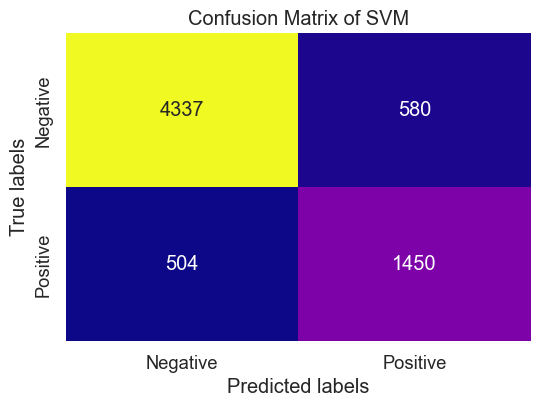

In [22]:
import seaborn as sns
def plot_confusion_matrix(conf_matrix, labels):
    plt.figure(figsize=(6, 4))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='plasma', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix of SVM')
    plt.show()
confusion_matrix_data = np.array([[4337, 580],
                                   [504, 1450]])
class_labels = ['Negative', 'Positive']
plot_confusion_matrix(confusion_matrix_data, class_labels)

precision_score, f1_score, recall_score, accuracy_score of SVM

In [23]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc_score}')

Precision: 0.7142857142857143
Recall: 0.7420675537359263
F1 Score: 0.7279116465863453
Accuracy: 0.8422354824625237


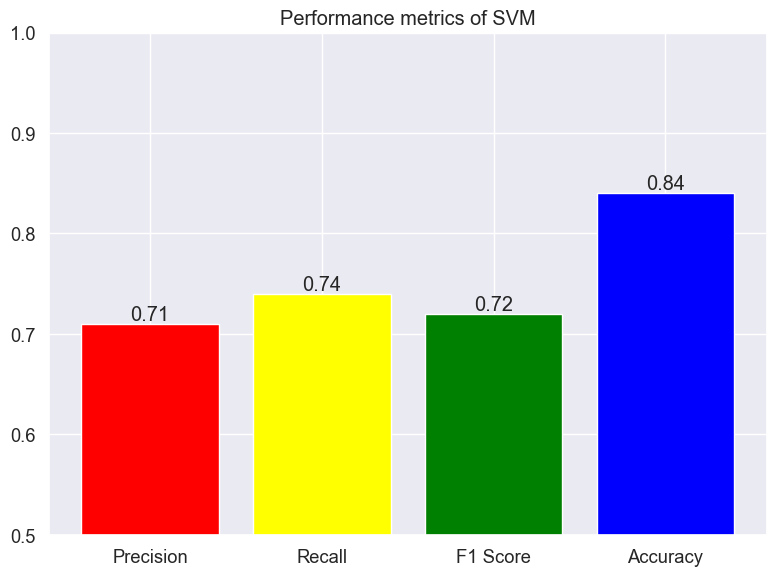

In [24]:
import matplotlib.pyplot as plt
algorithms = ['Precision', 'Recall', 'F1 Score', 'Accuracy'] 
accuracy_scores = [0.71, 0.74, 0.72, 0.84]         
plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracy_scores, color=['red', 'yellow', 'green', 'blue'])
plt.title('Performance metrics of SVM')
plt.ylim(0.5, 1.0)
for i in range(len(algorithms)):
    plt.text(i, accuracy_scores[i], f'{accuracy_scores[i]:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(max_depth=2, random_state=0) 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Printing the values of confusion matrix of random forest

In [26]:
cm= confusion_matrix(y_test,y_pred) 
print(cm)

[[4701  216]
 [ 883 1071]]


Plotting of confusion matrix of random forest

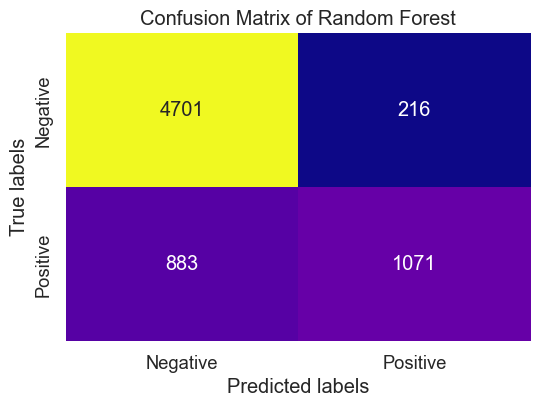

In [27]:
import seaborn as sns
def plot_confusion_matrix(conf_matrix, labels):
    plt.figure(figsize=(6, 4))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='plasma', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix of Random Forest')
    plt.show()
confusion_matrix_data = np.array([[4701, 216],
                                   [883, 1071]])
class_labels = ['Negative', 'Positive']
plot_confusion_matrix(confusion_matrix_data, class_labels)

precision_score, f1_score, recall_score, accuracy_score of Random Forest

In [28]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc_score}')

Precision: 0.8321678321678322
Recall: 0.5481064483111566
F1 Score: 0.6609071274298055
Accuracy: 0.8400523941202154


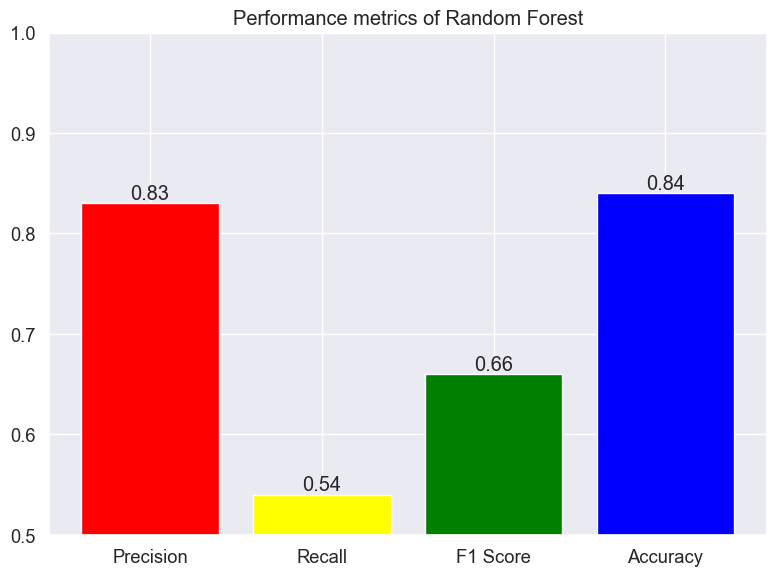

In [29]:
import matplotlib.pyplot as plt
algorithms = ['Precision', 'Recall', 'F1 Score', 'Accuracy'] 
accuracy_scores = [0.83, 0.54, 0.66, 0.84]         
plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracy_scores, color=['red', 'yellow', 'green', 'blue'])
plt.title('Performance metrics of Random Forest')
plt.ylim(0.5, 1.0)
for i in range(len(algorithms)):
    plt.text(i, accuracy_scores[i], f'{accuracy_scores[i]:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

RNN

In [71]:
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)
output_dim = 1
time_steps = X_train.shape[1]
learning_rate = 0.0001  
dropout_rate = 0.3   
batch_size = 64
epochs = 20
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
input_layer = tf.keras.Input(shape=(time_steps, 1), dtype=tf.float32)
initial_state = tf.keras.Input(shape=(64,), dtype=tf.float32)  
rnn_layer = tf.keras.layers.SimpleRNN(64, activation='relu', return_sequences=False)(input_layer, initial_state=initial_state)
dropout_layer = tf.keras.layers.Dropout(dropout_rate)(rnn_layer)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(dropout_layer)
model = tf.keras.Model(inputs=[input_layer, initial_state], outputs=output_layer)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate) 
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit([X_train, np.zeros((X_train.shape[0], 64))], y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2) 
y_pred = model.predict([X_test, np.zeros((X_test.shape[0], 64))])
print("Shape of y_pred:", y_pred.shape)

Epoch 1/20
344/344 [==============================] - 2s 5ms/step - loss: 0.5580 - accuracy: 0.6984 - val_loss: 0.4244 - val_accuracy: 0.7695
Epoch 2/20
344/344 [==============================] - 1s 4ms/step - loss: 0.3647 - accuracy: 0.8251 - val_loss: 0.3258 - val_accuracy: 0.8401
Epoch 3/20
344/344 [==============================] - 1s 4ms/step - loss: 0.3336 - accuracy: 0.8468 - val_loss: 0.3137 - val_accuracy: 0.8510
Epoch 4/20
344/344 [==============================] - 2s 4ms/step - loss: 0.3250 - accuracy: 0.8504 - val_loss: 0.3063 - val_accuracy: 0.8568
Epoch 5/20
344/344 [==============================] - 2s 6ms/step - loss: 0.3159 - accuracy: 0.8570 - val_loss: 0.3005 - val_accuracy: 0.8588
Epoch 6/20
344/344 [==============================] - 2s 5ms/step - loss: 0.3074 - accuracy: 0.8589 - val_loss: 0.2929 - val_accuracy: 0.8637
Epoch 7/20
344/344 [==============================] - 2s 4ms/step - loss: 0.3026 - accuracy: 0.8620 - val_loss: 0.2878 - val_accuracy: 0.8674
Epoch 

In [72]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_test: (6871,)
Shape of y_pred: (6871, 1)


Plotting the confusion matrix of RNN

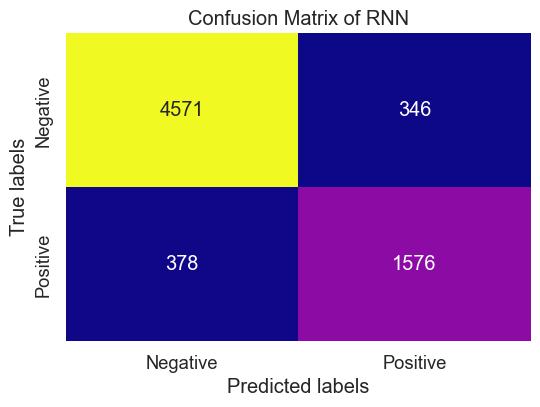

In [76]:
import seaborn as sns
def plot_confusion_matrix(conf_matrix, labels):
    plt.figure(figsize=(6, 4))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='plasma', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix of RNN')
    plt.show()
confusion_matrix_data = np.array([[4571, 346],
                                   [378, 1576]])
class_labels = ['Negative', 'Positive']
plot_confusion_matrix(confusion_matrix_data, class_labels)

precision_score, f1_score, recall_score, accuracy_score of RNN

In [77]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Squeeze the y_pred array to remove the extra dimension
y_pred_squeezed = np.squeeze(y_pred, axis=-1)

# Compute precision, recall, f1-score, and accuracy
precision = precision_score(y_test, y_pred_squeezed.round())
recall = recall_score(y_test, y_pred_squeezed.round())
f1 = f1_score(y_test, y_pred_squeezed.round())
accuracy = accuracy_score(y_test, y_pred_squeezed.round())

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)


Precision: 0.7940421160760144
Recall: 0.7911975435005117
F1-score: 0.7926172776211228
Accuracy: 0.882258768738175


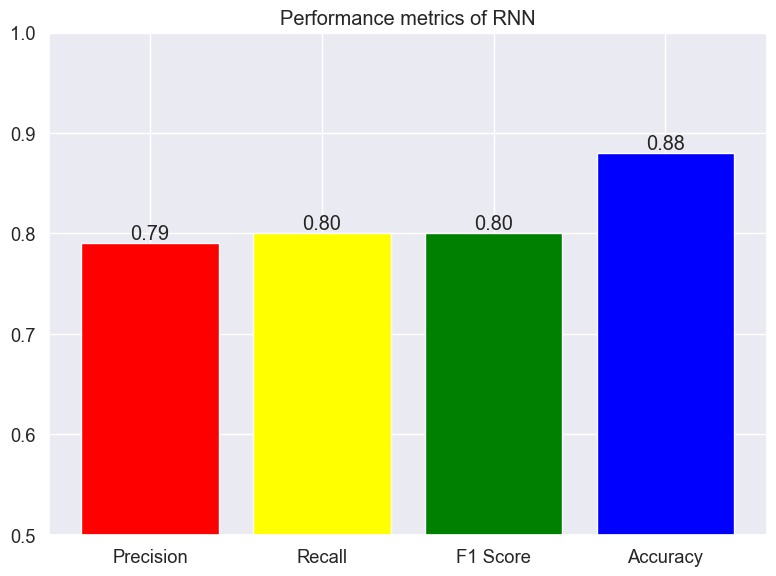

In [78]:
import matplotlib.pyplot as plt
algorithms = ['Precision', 'Recall', 'F1 Score', 'Accuracy'] 
accuracy_scores = [0.79, 0.80, 0.80, 0.88]         
plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracy_scores, color=['red', 'yellow', 'green', 'blue'])
plt.title('Performance metrics of RNN')
plt.ylim(0.5, 1.0)
for i in range(len(algorithms)):
    plt.text(i, accuracy_scores[i], f'{accuracy_scores[i]:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

DNN

In [79]:
import numpy as np
from sklearn.neural_network import MLPClassifier
num_samples, time_steps, num_features = X_train.shape
X_train_2d = X_train.reshape(num_samples, -1)
dnn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
dnn_model.fit(X_train_2d, y_train)
X_test_2d = X_test.reshape(X_test.shape[0], -1)
y_pred = dnn_model.predict(X_test_2d)

Printing the values of Confusion matrix of DNN

In [80]:
cm= confusion_matrix(y_test,y_pred) 
print(cm)

[[4823   94]
 [ 100 1854]]


Plotting the confusion matrix of DNN

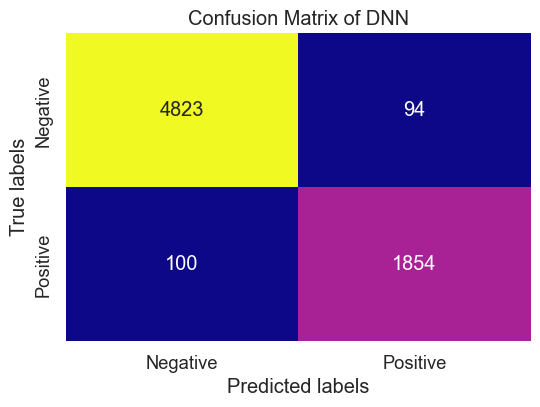

In [81]:
import seaborn as sns
def plot_confusion_matrix(conf_matrix, labels):
    plt.figure(figsize=(6, 4))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='plasma', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix of DNN')
    plt.show()
confusion_matrix_data = np.array([[4823, 94],
                                   [100, 1854]])
class_labels = ['Negative', 'Positive']
plot_confusion_matrix(confusion_matrix_data, class_labels)

precision_score, f1_score, recall_score, accuracy_score of DNN

In [82]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc_score}')

Precision: 0.9517453798767967
Recall: 0.9488229273285568
F1 Score: 0.9502819067145055
Accuracy: 0.9717653907728133


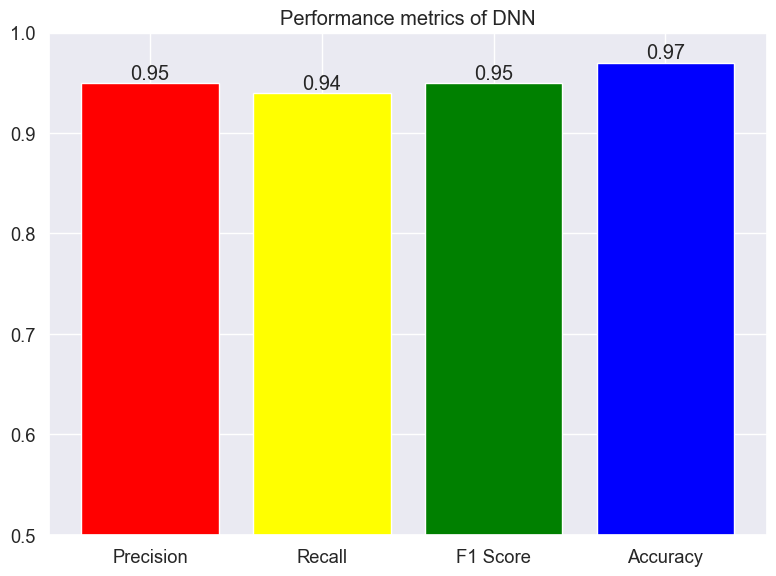

In [83]:
import matplotlib.pyplot as plt
algorithms = ['Precision', 'Recall', 'F1 Score', 'Accuracy'] 
accuracy_scores = [0.95, 0.94, 0.95, 0.97]         
plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracy_scores, color=['red', 'yellow', 'green', 'blue'])
plt.title('Performance metrics of DNN')
plt.ylim(0.5, 1.0)
for i in range(len(algorithms)):
    plt.text(i, accuracy_scores[i], f'{accuracy_scores[i]:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

comparision of Three algorithms

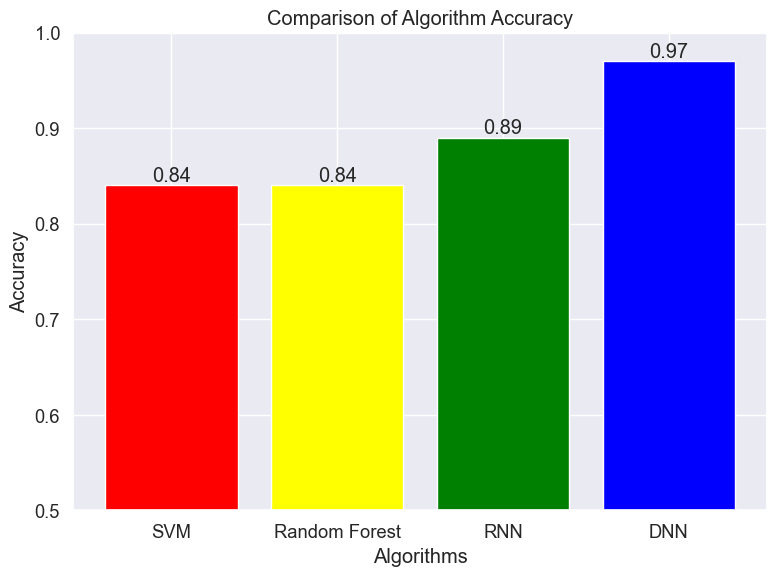

In [84]:
import matplotlib.pyplot as plt
algorithms = ['SVM', 'Random Forest', 'RNN', 'DNN'] 
accuracy_scores = [0.84, 0.84, 0.89, 0.97]         
plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracy_scores, color=['red', 'yellow', 'green', 'blue'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Accuracy')
plt.ylim(0.5, 1.0)
for i in range(len(algorithms)):
    plt.text(i, accuracy_scores[i], f'{accuracy_scores[i]:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()